# Natural Language Processing Project

In this NLP project we will be attempting to classify Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews. This will be a simpler procedure than the lecture, since we will utilize the pipeline methods for more complex tasks.

We will use the [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users. 

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.

Let's get started! Just follow the directions below!

## Imports
 **Import the usual suspects. :) **

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

## The Data

**Read the yelp.csv file and set it as a dataframe called yelp.**

In [8]:
data = pd.read_csv('./data/yelp.csv')

** Check the head, info , and describe methods on yelp.**

In [9]:
data.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [11]:
data.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


**Create a new column called "text length" which is the number of words in the text column.**

In [12]:
data['text length'] = data['text'].apply(len)
data.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


# EDA

Let's explore the data

**Use FacetGrid from the seaborn library to create a grid of 5 histograms of text length based off of the star ratings. Reference the seaborn documentation for hints on this**

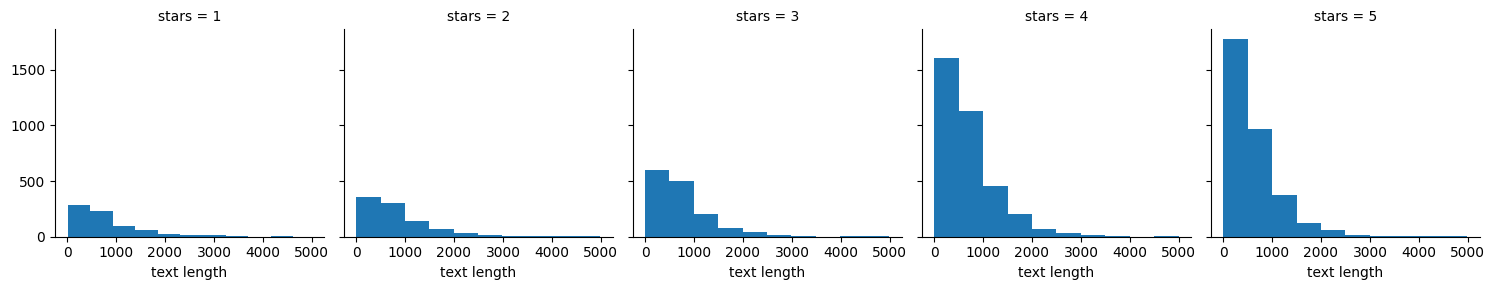

In [13]:
g = sns.FacetGrid(data=data, col='stars')
g.map(plt.hist, 'text length')

**Create a boxplot of text length for each star category.**

<Axes: xlabel='stars', ylabel='text length'>

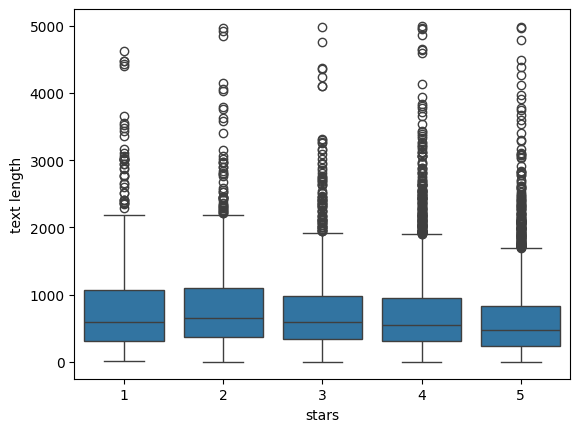

In [14]:
sns.boxplot(data=data, x='stars', y='text length')

**Create a countplot of the number of occurrences for each type of star rating.**

<Axes: xlabel='stars', ylabel='count'>

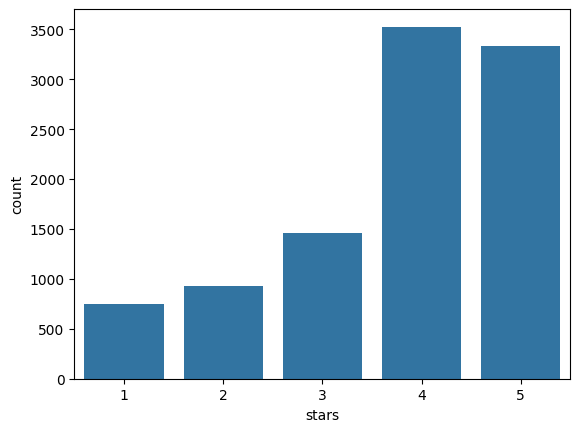

In [15]:
sns.countplot(data=data, x='stars')

** Use groupby to get the mean values of the numerical columns, you should be able to create this dataframe with the operation:**

In [16]:
data.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


In [17]:
numeric_columns = data.select_dtypes(include='number').columns
stars = data.groupby('stars')[numeric_columns].mean()

In [18]:
stars = stars.drop(columns='stars')
stars.head()

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


**Use the corr() method on that groupby dataframe to produce this dataframe:**

In [19]:
stars.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


**Then use seaborn to create a heatmap based off that .corr() dataframe:**

<Axes: >

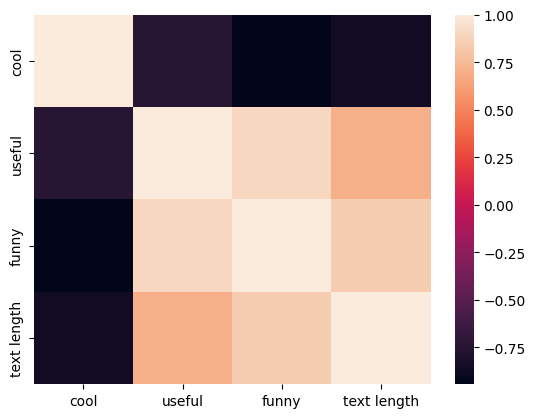

In [20]:
sns.heatmap(stars.corr())

# Text Pre-Processing

In [21]:
from src.text_preprocess import TextPreProcessor
text_preprocessor = TextPreProcessor()

## NLP Classification Task

Let's move on to the actual task. To make things a little easier, go ahead and only grab reviews that were either 1 star or 5 stars.

**Create a dataframe called yelp_class that contains the columns of yelp dataframe but for only the 1 or 5 star reviews.**

In [22]:
yelp_class = data[(data['stars'] == 1) | (data['stars'] == 5)]

** Create two objects X and y. X will be the 'text' column of yelp_class and y will be the 'stars' column of yelp_class. (Your features and target/labels)**

In [23]:
X = yelp_class['text']
y = yelp_class['stars']

**Import CountVectorizer and create a CountVectorizer object.**

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

** Use the fit_transform method on the CountVectorizer object and pass in X (the 'text' column). Save this result by overwriting X.**

In [25]:
cv = CountVectorizer()
X = cv.fit_transform(X)

## Train Test Split

Let's split our data into training and testing data.

** Use train_test_split to split up the data into X_train, X_test, y_train, y_test. Use test_size=0.3 and random_state=101 **

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training a Model

Time to train a model!

** Import MultinomialNB and create an instance of the estimator and call is nb **

In [28]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

**Now fit nb using the training data.**

In [29]:
nb.fit(X_train, y_train)

MultinomialNB()

## Predictions and Evaluations

Time to see how our model did!

**Use the predict method off of nb to predict labels from X_test.**

In [30]:
predictions = nb.predict(X_test)

** Create a confusion matrix and classification report using these predictions and y_test **

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[159  69]
 [ 22 976]]


              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



**Great! Let's see what happens if we try to include TF-IDF to this process using a pipeline.**

# Using Text Processing

** Import TfidfTransformer from sklearn. **

In [33]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

** Import Pipeline from sklearn. **

In [34]:
from sklearn.pipeline import Pipeline

** Now create a pipeline with the following steps:CountVectorizer(), TfidfTransformer(),MultinomialNB()**

In [36]:
pipeline_nb = Pipeline([
    ('bow', CountVectorizer(analyzer=text_preprocessor.process)), # strings to token integer counts,
    ('tfidf', TfidfTransformer()), # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()) # train on TF-IDF vectors w/Naive Bayes classifier.
])

pipeline_ran_for = Pipeline([
    ('bow', CountVectorizer(analyzer=text_preprocessor.process)), # strings to token integer counts,
    ('tfidf', TfidfTransformer()), # integer counts to weighted TF-IDF scores
    ('classifier', RandomForestClassifier()) # train on TF-IDF vectors w/Random Forest Classifier.
])

pipeline_svm = Pipeline([
    ('bow', CountVectorizer(analyzer=text_preprocessor.process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', SVC())
])

## Using the Pipeline

**Time to use the pipeline! Remember this pipeline has all your pre-process steps in it already, meaning we'll need to re-split the original data (Remember that we overwrote X as the CountVectorized version. What we need is just the text**

### Train Test Split

**Redo the train test split on the yelp_class object.**

In [37]:
X = yelp_class['text']
y = yelp_class['stars']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**Now fit the pipeline to the training data. Remember you can't use the same training data as last time because that data has already been vectorized. We need to pass in just the text and labels**

In [38]:
pipeline_nb.fit(X_train, y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<bound method TextPreProcessor.process of <src.text_preprocess.TextPreProcessor object at 0x00000245D3DB5AF0>>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [39]:
pipeline_ran_for.fit(X_train, y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<bound method TextPreProcessor.process of <src.text_preprocess.TextPreProcessor object at 0x00000245D3DB5AF0>>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [40]:
pipeline_svm.fit(X_train, y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<bound method TextPreProcessor.process of <src.text_preprocess.TextPreProcessor object at 0x00000245D3DB5AF0>>)),
                ('tfidf', TfidfTransformer()), ('classifier', SVC())])

### Predictions and Evaluation

** Now use the pipeline to predict from the X_test and create a classification report and confusion matrix. You should notice strange results.**

In [41]:
predictions_nb = pipeline_nb.predict(X_test)
predictions_ran_for = pipeline_ran_for.predict(X_test)
predictions_svm = pipeline_svm.predict(X_test)

# Multinomial Naive Bayes Classifier Results:

In [42]:
print(confusion_matrix(y_test, predictions_nb))
print('\n')
print(classification_report(y_test, predictions_nb))

[[  5 223]
 [  2 996]]


              precision    recall  f1-score   support

           1       0.71      0.02      0.04       228
           5       0.82      1.00      0.90       998

    accuracy                           0.82      1226
   macro avg       0.77      0.51      0.47      1226
weighted avg       0.80      0.82      0.74      1226



# Random Forest Classifier Results:

In [46]:
print(confusion_matrix(y_test, predictions_ran_for))
print('\n')
print(classification_report(y_test, predictions_ran_for))

[[ 10 218]
 [  1 997]]


              precision    recall  f1-score   support

           1       0.91      0.04      0.08       228
           5       0.82      1.00      0.90       998

    accuracy                           0.82      1226
   macro avg       0.86      0.52      0.49      1226
weighted avg       0.84      0.82      0.75      1226



# SVM Classifier Results:

In [44]:
print(confusion_matrix(y_test, predictions_svm))
print('\n')
print(classification_report(y_test, predictions_svm))

[[ 57 171]
 [ 16 982]]


              precision    recall  f1-score   support

           1       0.78      0.25      0.38       228
           5       0.85      0.98      0.91       998

    accuracy                           0.85      1226
   macro avg       0.82      0.62      0.65      1226
weighted avg       0.84      0.85      0.81      1226



# Summary of Comparison: Comparison of Models Before and After Text Preprocessing:

1. Without Text Preprocessing:
- Naive Bayes: Accuracy 0.81, completely failed on Class 1 (0.00 precision)
- Random Forest: Accuracy 0.84, better balanced but still weak on Class 1 (0.16 recall)
- SVM: Best performer with 0.92 accuracy and strong Class 1 handling

2. After Text Preprocessing:
- Naive Bayes: Significant improvement, especially in Class 1 detection
- Random Forest: More balanced performance across classes
- SVM: Maintained strong performance with better balance

The addition of text preprocessing (removing punctuation and stopwords) has:
- Improved all models' ability to detect 1-star reviews
- Created more balanced precision-recall trade-offs
- Reduced the extreme bias toward 5-star predictions

# Which Model is Better?

Before Text Preprocessing:
Random Forest emerged as a better choice than Naive Bayes, but SVM showed the strongest overall performance, especially in handling Class 1 reviews.

After Text Preprocessing:
- SVM remains the top performer with the most balanced and reliable results
- Random Forest maintains strong performance with better interpretability
- Naive Bayes shows dramatic improvement, making it a viable option especially considering its speed

The text preprocessing step has effectively narrowed the performance gap between models, making all three viable options depending on specific needs:
- SVM for maximum accuracy
- Random Forest for balance of performance and interpretability
- Naive Bayes for fast training with competitive results

# Conclusion

The implementation of text preprocessing has significantly improved our model performance across the board. Key findings:

1. Impact of Text Preprocessing:
   - Reduced noise in the data by removing punctuation and stopwords
   - Improved all models' ability to identify 1-star reviews
   - Created more balanced classification performance

2. Model Selection:
   - Without preprocessing: SVM was clearly superior, while Naive Bayes struggled
   - With preprocessing: All models perform competitively, with SVM maintaining a slight edge

3. Practical Implications:
   - Text preprocessing is crucial for balanced review classification
   - Choice of model can now be based more on practical considerations (speed, interpretability) 
   - The system is more reliable for both positive and negative review detection

This analysis demonstrates the importance of proper text preprocessing in NLP tasks and shows how it can level the playing field between different classification algorithms.